## Introduction

This dataset presents water quality analysis results, capturing key parameters measured across various sites. Each record includes details such as sample identification, collection date, depth, and location, alongside specific water quality parameters and their measured values. The data is essential for monitoring environmental conditions, assessing potential contaminants, and ensuring water safety.

# importing data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv(r"C:\dataanalytics\dataset\Water_quality_analysis.csv")
print(df)

      Sample ID   Grab ID  Profile ID Sample Number        Collect DateTime  \
0         16316   16316.0       10702       9209019  04/13/1992 12:00:00 AM   
1          8937    8937.0       37688       7915489  06/20/1979 12:00:00 AM   
2        137745  137745.0       54368      L58228-1  06/25/2013 08:09:00 AM   
3        131816  131816.0       50605      L55068-6  02/13/2012 09:38:00 AM   
4         82325   82325.0       43896     L52933-87  03/30/2011 02:36:00 PM   
...         ...       ...         ...           ...                     ...   
1494     118601  118601.0       49632    L45838-114  05/28/2008 11:21:00 AM   
1495     167391       NaN       73521      L6419-13         07/10/1995 9:25   
1496      27432       NaN       30844      L38669-9        04/10/2006 11:19   
1497     157357       NaN       68548     L70507-12  08/15/2018 02:49:00 PM   
1498      40150   40150.0       40791     L42923-21        06/12/2007 11:58   

      Depth (m)           Site Type                

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sample ID         1499 non-null   int64  
 1   Grab ID           1062 non-null   float64
 2   Profile ID        1499 non-null   int64  
 3   Sample Number     1499 non-null   object 
 4   Collect DateTime  1499 non-null   object 
 5   Depth (m)         1062 non-null   float64
 6   Site Type         1499 non-null   object 
 7   Area              1499 non-null   object 
 8   Locator           1499 non-null   object 
 9   Site              1499 non-null   object 
 10  Parameter         1499 non-null   object 
 11  Value             1382 non-null   float64
 12  Units             1497 non-null   object 
 13  QualityId         1499 non-null   int64  
 14  Lab Qualifier     168 non-null    object 
 15  MDL               718 non-null    float64
 16  RDL               717 non-null    float64


### Change to datetime

In [43]:
df["Collect DateTime"]=pd.to_datetime(df["Collect DateTime"])
df["Date Analyzed"]=pd.to_datetime(df["Date Analyzed"])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sample ID         1499 non-null   int64         
 1   Grab ID           1062 non-null   float64       
 2   Profile ID        1499 non-null   int64         
 3   Sample Number     1499 non-null   object        
 4   Collect DateTime  1499 non-null   datetime64[ns]
 5   Depth (m)         1062 non-null   float64       
 6   Site Type         1499 non-null   object        
 7   Area              1499 non-null   object        
 8   Locator           1499 non-null   object        
 9   Site              1499 non-null   object        
 10  Parameter         1499 non-null   object        
 11  Value             1382 non-null   float64       
 12  Units             1497 non-null   object        
 13  QualityId         1499 non-null   int64         
 14  Lab Qualifier     168 no

## Checking null value

In [45]:
df.isna().sum()

Sample ID              0
Grab ID              437
Profile ID             0
Sample Number          0
Collect DateTime       0
Depth (m)            437
Site Type              0
Area                   0
Locator                0
Site                   0
Parameter              0
Value                117
Units                  2
QualityId              0
Lab Qualifier       1331
MDL                  781
RDL                  782
Text Value          1224
Sample Info         1497
Steward Note        1497
Replicates          1498
Replicate Of        1495
Method               218
Date Analyzed        835
Data Source            0
dtype: int64

In [46]:
del df["Replicate Of"]

In [47]:
del df["Replicates"]

In [48]:
del df["Steward Note"]

In [49]:
del df["Sample Info"]

In [50]:
df.isna().sum()

Sample ID              0
Grab ID              437
Profile ID             0
Sample Number          0
Collect DateTime       0
Depth (m)            437
Site Type              0
Area                   0
Locator                0
Site                   0
Parameter              0
Value                117
Units                  2
QualityId              0
Lab Qualifier       1331
MDL                  781
RDL                  782
Text Value          1224
Method               218
Date Analyzed        835
Data Source            0
dtype: int64

### Renaming columns

In [51]:
df=df.rename(columns={"Sample ID":"Sample_ID","Grab ID":"Grab_ID","Profile ID":"Profile_ID","Sample Number":"Sample_Number",
                  "Collect DateTime":"Collect_DateTime","Depth (m)":"Depth(m)","Site Type":"Site_Type",
                  "Lab Qualifier":"Lab_Qualifier","Text Value":"Text_Value","Date Analyzed":"Date_Analyzed","Data Source":"Data_Source"})

In [52]:
df.isna().sum()

Sample_ID              0
Grab_ID              437
Profile_ID             0
Sample_Number          0
Collect_DateTime       0
Depth(m)             437
Site_Type              0
Area                   0
Locator                0
Site                   0
Parameter              0
Value                117
Units                  2
QualityId              0
Lab_Qualifier       1331
MDL                  781
RDL                  782
Text_Value          1224
Method               218
Date_Analyzed        835
Data_Source            0
dtype: int64

### Adding data to null space

In [53]:
a=df["Grab_ID"].mean()
b=df["Grab_ID"].fillna(a,inplace=True)

In [54]:
a=df["Depth(m)"].median()
b=df["Depth(m)"].fillna(a,inplace=True)

In [55]:
a=df["Value"].mean()
b=df["Value"].fillna(a,inplace=True)

In [56]:
df["Lab_Qualifier"].fillna("Not available",inplace=True)

In [57]:
a=df["MDL"].median()
b=df["MDL"].fillna(a,inplace=True)

In [58]:
a=df["RDL"].mean()
b=df["RDL"].fillna(a,inplace=True)

In [59]:
df["Text_Value"].fillna("unavailable",inplace=True)

In [60]:
a=df["Date_Analyzed"].mean()
b=df["Date_Analyzed"].fillna(a,inplace=True)

In [61]:
df["Method"].fillna("none",inplace=True)

In [62]:
df["Units"].fillna("unaivailable",inplace=True)

In [63]:
df.isna().sum()

Sample_ID           0
Grab_ID             0
Profile_ID          0
Sample_Number       0
Collect_DateTime    0
Depth(m)            0
Site_Type           0
Area                0
Locator             0
Site                0
Parameter           0
Value               0
Units               0
QualityId           0
Lab_Qualifier       0
MDL                 0
RDL                 0
Text_Value          0
Method              0
Date_Analyzed       0
Data_Source         0
dtype: int64

### Checking duplicate

In [64]:
df.duplicated().sum()

0

## Project Questions

1) Which is the most used site type in water quality analysis?

In [65]:
z=df["Site_Type"].value_counts().idxmax()
print("Most used site is ",z)

Most used site is  Large Lakes


2) Which area is preffered more in analysis?

In [66]:
z=df["Area"].value_counts().idxmax()
print("Most preffered area is ",z)

Most preffered area is  Lake Washington


3) Most Data source?

In [67]:
z=df["Data_Source"].value_counts().idxmax()
print("most data source is ",z)

most data source is  KCEL


4) What is the average depth of samples collected?

In [68]:
z=df["Depth(m)"].mean()
print("Average Depth is ",z)

Average Depth is  8.947998665777185


5) What is the maximum value recorded?

In [69]:
z=df["Value"].max()
print("Maximum value recorded is ",z)

Maximum value recorded is  11000.0


6) What is the minimum value recorded?

In [70]:
z=df["Value"].min()
print("Minimum value recorded is ",z)

Minimum value recorded is  0.0


7) What is the average depth of Large lakes?


In [71]:
z=df[df["Site_Type"]=="Large Lakes"]["Depth(m)"]
print("Average depth =",z.mean())

Average depth = 11.333673469387753


8) What are the unique site types?


In [72]:
z=df["Site_Type"].unique()
print("unique site types are ",z)

unique site types are  ['Streams and Rivers' 'Large Lakes' 'Marine Intertidal' 'Marine Offshore']


9) How many samples are collected from each areas?

In [73]:
z=df["Area"].value_counts()
print("samples collected from each areas is:")
print(z)

samples collected from each areas is:
Lake Washington            523
Lake Sammamish             252
Lake Union/Ship Canal      156
Central Puget Sound         53
Green                       47
Bear                        30
Issaquah                    22
Duwamish                    21
Sammamish                   20
Cedar                       18
Pipers                      18
Crisp                       17
Juanita                     17
Jenkins                     15
North                       15
Longfellow                  14
Idylwood                    14
Newaukum                    14
Kelsey                      13
McAleer                     12
Forbes                      12
Swamp                       11
Lyon                        11
May                         11
Soos                        11
Tibbetts                    11
Mill                        10
Little Bear                 10
Evans                        9
Covington                    9
Springbrook/Black River      8
L

10) What are the main 5 different parameters used for water quality analysis? and show them in chart

The most used 5 different parameters and their counts used for the analysis are:
Temperature                           151
pH  Field                             125
Conductivity  Field                   116
Dissolved Oxygen  Field               108
Dissolved Oxygen Saturation  Field     92
Name: Parameter, dtype: int64


<Axes: >

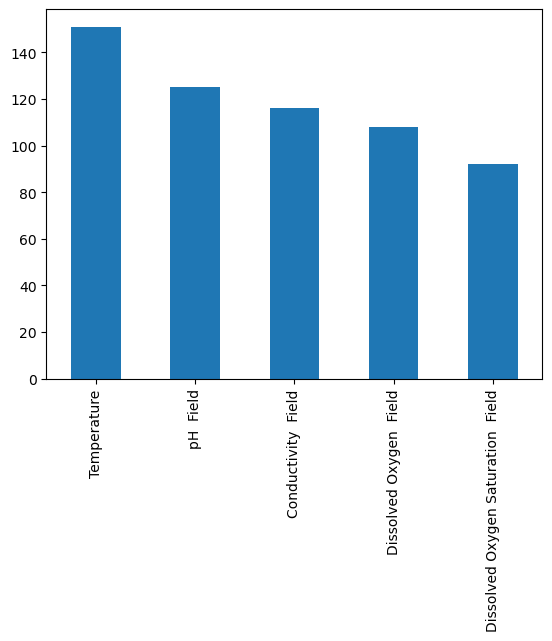

In [74]:
z=df["Parameter"].value_counts().head(5)
print("The most used 5 different parameters and their counts used for the analysis are:")
print(z)
z.plot(kind="bar")

11) What is the earliest date of sample collection?

In [75]:
z=df["Collect_DateTime"].min()
print("Earliest date collected is ",z)

Earliest date collected is  1972-06-05 00:00:00


12) How many samples have lab qualifiers?

In [76]:
z=df["Lab_Qualifier"].count()
print("count of lab qualifiers",z)

count of lab qualifiers 1499


13) How many samples have Quality id of 1?

In [77]:
z=len(df[df["QualityId"]==1])
print("quality id of 1 =",z)

quality id of 1 = 110


14) What is the date of the latest analysis?

In [78]:
z=df["Date_Analyzed"].max()
print("latest date analysed is ",z)

latest date analysed is  2019-08-12 00:00:00


15) What is the average pH value?

In [79]:
z=df[df["Parameter"]=="pH Field"]["Value"].mean()
print(z)

nan


## Conclusion

The data is based on Water Quality Analysis. The analysis held in different areas, sites and site types on different date and time. 
The Most used site is in the analysis is Large Lakes and the Most preffered area is  Lake Washington. The most data source is KCEL, Average Depth of samples collected is  10.572, in that the Average depth of Large lakes is around 11.33. The Maximum value recorded is  11000.0 and the minimum is 0.0. unique site types among this are Streams and Rivers, Large Lakes, Marine Intertidal, Marine Offshore. Earliest date sample collected is  1972-06-05 and latest date analysed is  2019-08-12. The count of lab qualifiers according to the data is 1499 and quality id of 1 is 110.